In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import w2m.data, w2m.viz, w2m.utils
reload(w2m.viz)
reload(w2m.data)
cfg = w2m.utils.cfg2dict("config.ini")
w2m_rawdir = cfg["data"]["w2m_raw"]
omie_rawdir = cfg["data"]["omie_raw"]
print "using w2m raw data dir at ", w2m_rawdir
print "using omie raw data dir at", omie_rawdir

using w2m raw data dir at  /Users/rlx/datasets/w2m/w2m_raw
using omie raw data dir at /Users/rlx/datasets/w2m/omie_raw


## IMPORTANT NOTE

- hours (periods) in pdbc and pibci range between 1 and 25
- hours in predictions range between 0 and 23
- for the moment **ALL IS TRANSFORMED TO 0-23** so that we can use pandas time series for alignment, etc.
- however, this needs to be looked into with **further care**  as in the days with 23 or 25 hours this might cause misalignments, or code exceptions


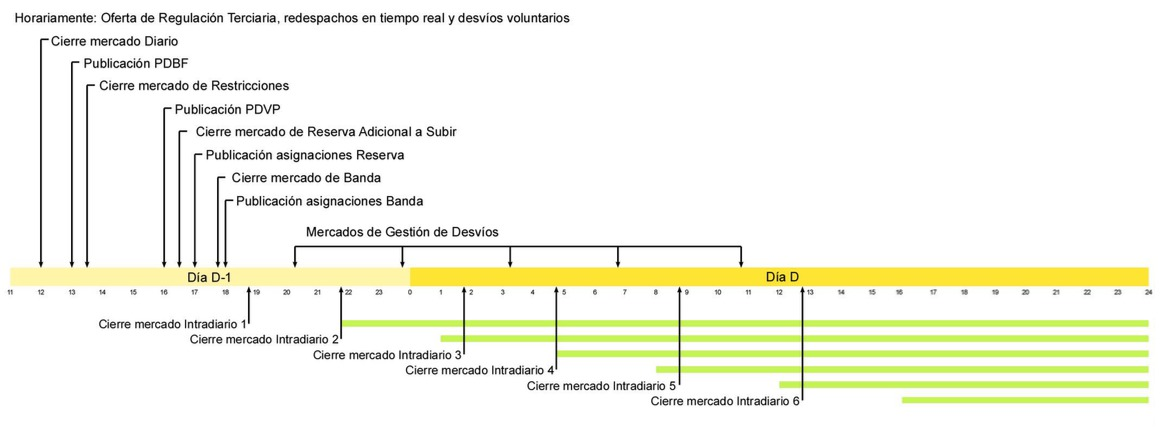

In [3]:
from IPython.display import Image
Image(filename='imgs/market-times.jpg') 

### programatically compute times

In [4]:
t = pd.read_csv("times.csv", delimiter=";", index_col=0)
t = t.append(pd.DataFrame([[int(i.split(":")[0]) for i in t.iloc[1]]], columns=t.columns, index=["hour_for_last_prediction"]))
t


,SESION_1,SESION_2,SESION_3,SESION_4,SESION_5,SESION_6
Apertura de Sesion,17:00,21:00,01:00,04:00,08:00,12:00
Cierre de Sesion,18:45,21:45,01:45,04:45,08:45,12:45
Casacion,19:30,22:30,02:30,05:30,09:30,13:30
Recepcion de desagregaciones de programa,19:50,22:50,02:50,05:50,09:50,13:50
Publicacion PHF,20:45,23:45,03:45,06:45,10:45,14:45
Horizonte de Programacion (Periodos horarios),27 horas (22-24),24 horas (1-24),20 horas (5-24),17 horas (8-24),13 horas (12-24),9 horas (16-24)
hour_for_last_prediction,18,21,1,4,8,12


In [5]:
delivery = pd.datetime(year=2018, month=5, day=10)

market_times, delivery_times, end_delivery = w2m.data.get_times_for_delivery(delivery)
print "market        last_prediction_avail  delivery_starts"
print "----------    ---------------------  -------------------"
for i,(mk,dl) in enumerate(zip(market_times, delivery_times)):
    print "intraday_%d"%i if i>0 else "diario    ", 
    print "  ", mk, "  ", dl
    
print "-------\ndelivery ends at", end_delivery

market        last_prediction_avail  delivery_starts
----------    ---------------------  -------------------
diario        2018-05-09 12:00:00    2018-05-10 00:00:00
intraday_1    2018-05-09 18:00:00    2018-05-10 00:00:00
intraday_2    2018-05-09 21:00:00    2018-05-10 00:00:00
intraday_3    2018-05-10 01:00:00    2018-05-10 04:00:00
intraday_4    2018-05-10 04:00:00    2018-05-10 07:00:00
intraday_5    2018-05-10 08:00:00    2018-05-10 11:00:00
intraday_6    2018-05-10 12:00:00    2018-05-10 15:00:00
-------
delivery ends at 2018-05-10 23:00:00


# Predicciones de generación

- predictions are received in different instants of the day for each kind of energy
- black bars show daily and intradaily markets
- the prediction line that **STARTS AT A BLACK BAR** is the one available to use before negotiation closes
- for instance, in **HIDRAULICA** the orange prediction is what is available at **intraday 4**, which is closes at 04.45, so the latest predictions available are the ones at 04.00, and delivers energy at 7am.

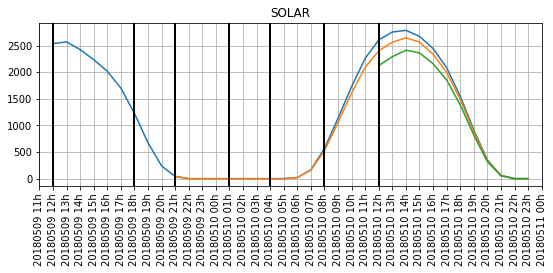

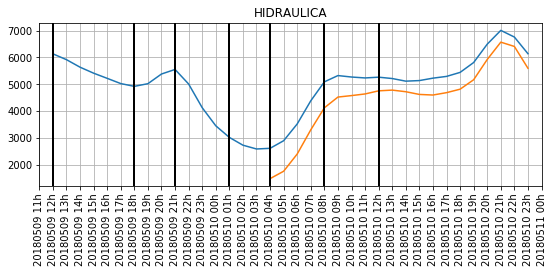

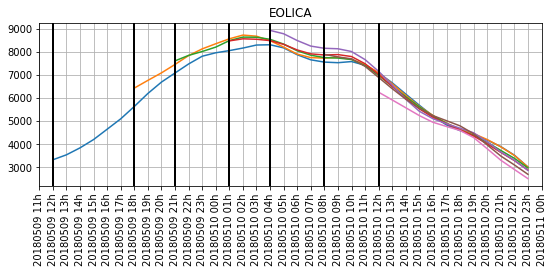

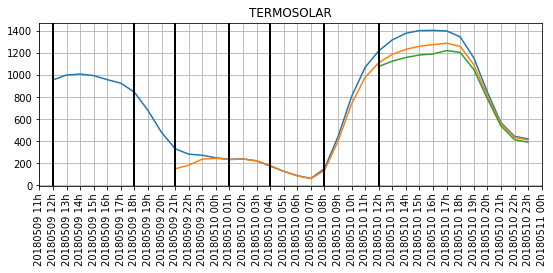

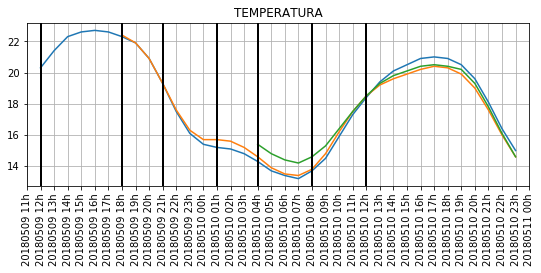

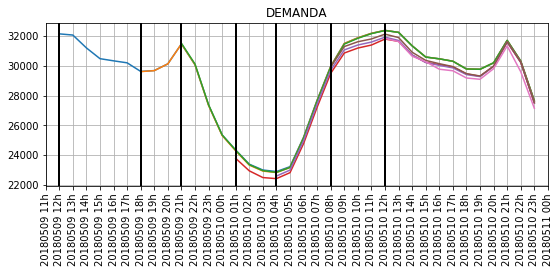

In [6]:

plt.figure(figsize=(9,3))
w2m.viz.plot_predictions(at_datetimes=market_times, to_datetime=end_delivery, pred_type="SOLAR", 
                         w2m_rawdir=w2m_rawdir, legend="none")

plt.figure(figsize=(9,3))
w2m.viz.plot_predictions(at_datetimes=market_times, to_datetime=end_delivery, pred_type="HIDRAULICA", 
                         w2m_rawdir=w2m_rawdir, legend="none")
plt.figure(figsize=(9,3))
w2m.viz.plot_predictions(at_datetimes=market_times, to_datetime=end_delivery, pred_type="EOLICA", 
                         w2m_rawdir=w2m_rawdir, legend="none")

plt.figure(figsize=(9,3))
w2m.viz.plot_predictions(at_datetimes=market_times, to_datetime=end_delivery, pred_type="TERMOSOLAR", 
                         w2m_rawdir=w2m_rawdir, legend="none")

plt.figure(figsize=(9,3))
w2m.viz.plot_predictions(at_datetimes=market_times, to_datetime=end_delivery, pred_type="TEMPERATURA", 
                         w2m_rawdir=w2m_rawdir, legend="none")

plt.figure(figsize=(9,3))
w2m.viz.plot_predictions(at_datetimes=market_times, to_datetime=end_delivery, pred_type="DEMANDA", 
                         w2m_rawdir=w2m_rawdir, legend="none")

### preguntas

- el primer mercado intradiario empieza en 22h de D-1 y el mercado diario empieza en 00h de D
- en los forecasts, qué es p10 y p90, ¿el intervalo de confianza de la predicción, sigmas?
- qué diferencia entre el seasonal temperature y el la predicción? el seasonal es verdaderamente predicción?
- diferencia entre previsiones (individual por generador?) y predicciones (general por tipo de generación?)
- el periodo 1 es de 00:00 a 01:00? , el 2 de 01:00 a 02:00?, etc.
- check: ES/PT ok en marginales en `w2m.data`?


# Inspección de precios

### precios de casación

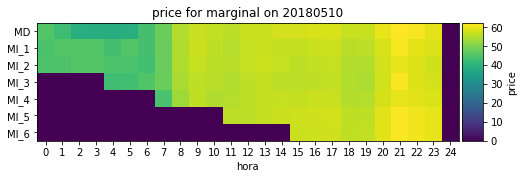

In [13]:
plt.figure(figsize=(8,3))
w2m.data.InfoUnidadDia.price_from_marginals(w2m_rawdir, delivery).plot()

### diferencial de precios de casación

la misma información anterior, pero en modo diferencial.

se muestra la diferencia del precio de casación en cada mercado con el inmediatamente anterior. P.ej. se ve un aumento de precio en el primer intradiarioen las horas 1-5 respecto al mercado diario

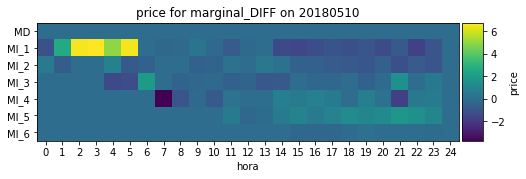

In [15]:
plt.figure(figsize=(8,3))
w2m.data.InfoUnidadDia.price_from_marginals(w2m_rawdir, delivery).make_differential_to_previous_market().plot()

# Inspección de energia vendida/comprada vs. predicciones

- **izquierda**: energía comprada/vendida
- **centro**: predicción relevante (misma información que en las gráficas anteriores)
- **derecha**: diferencial del anterior entre mercados consecutivos (intradiario 1 vs. diario, intradiario 2 vs intradiario 1, etc.)


In [22]:
def show_unidad_with_preds(delivery_date, unidad, energy_source):
    plt.figure(figsize=(20,3))
    plt.subplot(131)
    w2m.data.InfoUnidadDia.energy_from_casacion(w2m_rawdir, delivery_date, unidad).plot()
    plt.subplot(132)
    k = w2m.data.InfoUnidadDia.from_predictions(w2m_rawdir, delivery_date, energy_source)
    k.plot()
    plt.subplot(133)
    k.make_differential_to_previous_market().plot()

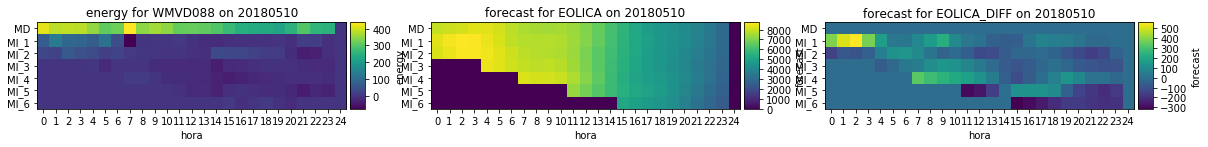

In [23]:
show_unidad_with_preds(delivery, "WMVD088", "EOLICA")

el comportamiento de las termosolares es raro ... como si los datos no estuvieran bien alineados:

- las predicciones vienen a las 09:00 y a las 21:00
- por tanto solo el mercado diario, y los intradiarios 2 y 6 tienen predicciones frescas respecto a los demás.

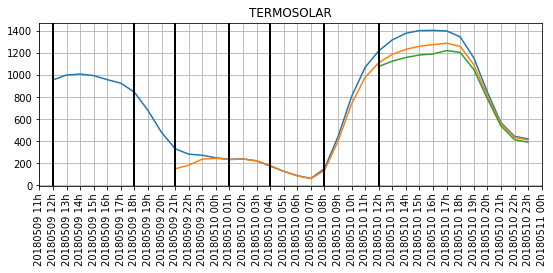

In [28]:
plt.figure(figsize=(9,3))
w2m.viz.plot_predictions(at_datetimes=market_times, to_datetime=end_delivery, pred_type="TERMOSOLAR", 
                         w2m_rawdir=w2m_rawdir, legend="none")


pero parece que el moviemiento se hace más **en el intradiario 3 y el 5**

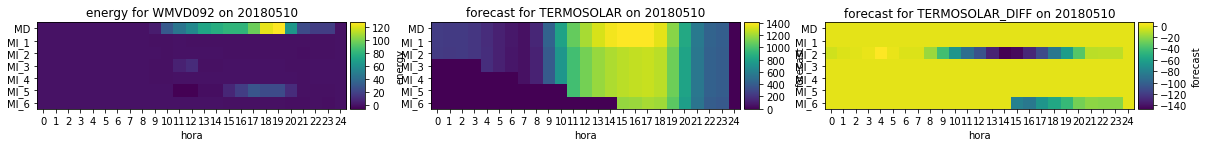

In [24]:
show_unidad_with_preds(delivery, "WMVD092", "TERMOSOLAR")

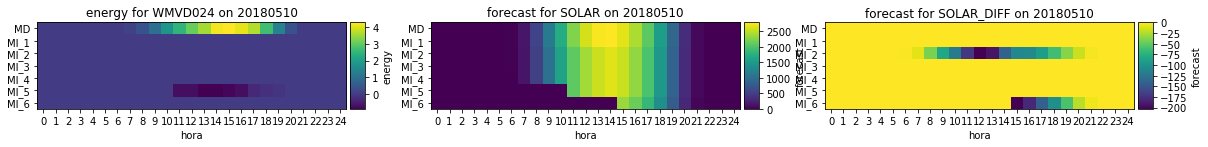

In [25]:
show_unidad_with_preds(delivery, "WMVD024", "SOLAR")

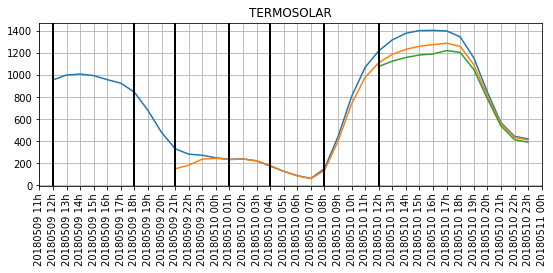

In [27]:
plt.figure(figsize=(9,3))
w2m.viz.plot_predictions(at_datetimes=market_times, to_datetime=end_delivery, pred_type="TERMOSOLAR", 
                         w2m_rawdir=w2m_rawdir, legend="none")
